In [1]:
import tensorflow as tf
import cv2
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/Saved Pictures/'

In [4]:
import glob
import tensorflow as tf

image_paths = glob.glob(os.path.join(data_dir, "*.jpg"))  #list of image paths


print(f"Found {len(image_paths)} images.")


Found 48 images.


In [25]:
def load_and_preprocess_image_opencv(image_path):

    image = cv2.imread(image_path)


    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    image = cv2.resize(image, (224, 224))


    image = image / 255 ##range [0,1]

    return image

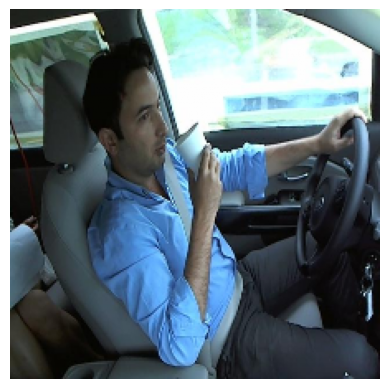

In [27]:
import matplotlib.pyplot as plt
def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

image = load_and_preprocess_image_opencv(image_paths[2])
display_image(image)

In [7]:
def load_images_with_opencv(image_paths):
    images = [load_and_preprocess_image_opencv(img_path) for img_path in image_paths] #used list comprehension
    images = np.array(images)
    return images

images = load_images_with_opencv(image_paths)


In [8]:
images[1:5]

array([[[[0.10980392, 0.12156863, 0.09411765],
         [0.11372549, 0.1254902 , 0.09803922],
         [0.12156863, 0.13333333, 0.10588235],
         ...,
         [0.6627451 , 0.97647059, 0.98823529],
         [0.81176471, 1.        , 1.        ],
         [0.07058824, 0.1372549 , 0.1254902 ]],

        [[0.10980392, 0.12156863, 0.09411765],
         [0.10588235, 0.11764706, 0.09019608],
         [0.11764706, 0.12941176, 0.10196078],
         ...,
         [0.67058824, 0.98823529, 0.99607843],
         [0.80392157, 0.99607843, 1.        ],
         [0.07058824, 0.14509804, 0.14509804]],

        [[0.10980392, 0.12156863, 0.09411765],
         [0.10980392, 0.12156863, 0.09411765],
         [0.11372549, 0.1254902 , 0.09803922],
         ...,
         [0.48627451, 0.81568627, 0.84313725],
         [0.65490196, 0.85882353, 0.8745098 ],
         [0.05490196, 0.14117647, 0.13333333]],

        ...,

        [[0.01960784, 0.02352941, 0.00392157],
         [0.01960784, 0.02352941, 0.00392157]

In [9]:

image_dataset = tf.data.Dataset.from_tensor_slices(images)
batch_size = 32
image_dataset = image_dataset.batch(batch_size)

In [10]:
image_dataset = image_dataset.shuffle(buffer_size=len(image_paths))
for batch in image_dataset.take(1):
    print(f"Batch shape: {batch.shape}")

Batch shape: (16, 112, 112, 3)


In [11]:
##data augmentation part using tf
def augment_image(image):

    image = tf.image.random_flip_left_right(image)


    image = tf.image.random_brightness(image, max_delta=0.1)


    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)


    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

    return image.numpy()


In [12]:
augmented_images = []

for image in image_dataset:
    for single_image in image:
        augmented_image = augment_image(single_image)
        augmented_images.append(augmented_image)


augmented_image_dataset = tf.data.Dataset.from_tensor_slices(augmented_images)
batch_size = 32
augmented_image_dataset = augmented_image_dataset.batch(batch_size)

combined_dataset = image_dataset.concatenate(augmented_image_dataset)


In [13]:
for batch in combined_dataset.take(1):
    print(f"Batch shape: {batch.shape}")


Batch shape: (32, 112, 112, 3)


In [14]:
for batch in combined_dataset:
  for image in batch:
    image_np = np.array(image)

print(image_np.shape)





(112, 112, 3)


In [15]:
import sklearn
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(image_np, test_size=0.2, random_state=42)

In [16]:
train_dataset

array([[[ 0.64910251,  0.81953096,  0.82646614],
        [ 0.72891724,  0.82591617,  0.82965869],
        [ 0.72253203,  0.82591617,  0.81050318],
        ...,
        [ 0.10955513,  0.12673935,  0.13686711],
        [ 0.07762924,  0.09162089,  0.10494122],
        [ 0.05528113,  0.07565795,  0.08259311]],

       [[ 0.21491055,  0.27359843,  0.28053358],
        [ 0.21491055,  0.26721326,  0.26457065],
        [ 0.21491055,  0.26402068,  0.24860771],
        ...,
        [ 0.11274772,  0.12993194,  0.14963746],
        [ 0.10316996,  0.12035418,  0.14005969],
        [ 0.09359218,  0.11077642,  0.13048193]],

       [[ 0.46393242,  0.6056276 ,  0.61575532],
        [ 0.68741357,  0.78760511,  0.820081  ],
        [ 0.56609523,  0.68544227,  0.7051478 ],
        ...,
        [ 0.18298465,  0.22570962,  0.23902994],
        [ 0.04570336,  0.07246537,  0.08897828],
        [ 0.07443666,  0.08523571,  0.10813381]],

       ...,

       [[ 0.23406608,  0.3119095 ,  0.31245947],
        [ 0